# fifa analysis: value
---

# summary



# context
This is an exercise i've created to practice analytics. I am using a dataset from kaggle.com that represents individual fifa players. My goal is to provide insights for a team manager from the data. I assume that the team manager wants to optimize for the most skilled team that brings the most money.
   
#### data
* Player personal attributes (Nationality, Club, Photo, Age, Value etc.)
* Player performance attributes (Overall, Potential, Aggression, Agility etc.)
* Player preferred position and ratings at all positions.

---


# predicting value of a player
### problem
what is it that makes a player valuable?

### hypothesis
a player's value is determined by:
* age: older players are more valuable
* Overall skill: compared to other players on his club
* best position: forwards and midfields are more valuable than defense

### assumptions


### procedure
* find the correlation between age and value
* group players by club
* find the correlation between skill and value per club
* find the correlation between best position and value per club
* create a linear model that uses age, skill, position, and club to predict value
---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
players = pd.read_csv("CompleteDataset_replacements.csv",index_col='index')
players.head()

/Users/nico/code/pydata-env/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning: Columns (23,35) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,...,RM,RS,RW,RWB,ST,best_position_rating,best_positions,preferred_positions,overlap_with_worst,age_adjusted_overall
index,,,,,,,,,,,,,,,,,,,,,
0,Cristiano Ronaldo,32,https://cdn.sofifa.org/48/18/players/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Real Madrid CF,https://cdn.sofifa.org/24/18/teams/243.png,95500000.0,...,89.0,92.0,91.0,66.0,92.0,92.0,"['CF', 'LF', 'LS', 'LW', 'RF', 'RS', 'RW', 'ST']","['ST', 'LW']",0.0,91.892183
1,L. Messi,30,https://cdn.sofifa.org/48/18/players/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,93,93,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,105000000.0,...,90.0,88.0,91.0,62.0,88.0,92.0,"['CAM', 'CF', 'LAM', 'LF', 'LW', 'RAM', 'RF', ...",['RW'],0.0,90.457849
2,Neymar,25,https://cdn.sofifa.org/48/18/players/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,94,Paris Saint-Germain,https://cdn.sofifa.org/24/18/teams/73.png,123000000.0,...,87.0,84.0,89.0,64.0,84.0,89.0,"['CAM', 'CF', 'LAM', 'LF', 'LW', 'RAM', 'RF', ...",['LW'],0.0,92.000000
3,L. Suárez,30,https://cdn.sofifa.org/48/18/players/176580.png,Uruguay,https://cdn.sofifa.org/flags/60.png,92,92,FC Barcelona,https://cdn.sofifa.org/24/18/teams/241.png,97000000.0,...,85.0,88.0,87.0,68.0,88.0,88.0,"['CAM', 'CF', 'LAM', 'LF', 'LS', 'LW', 'RAM', ...",['ST'],0.0,89.485184
4,M. Neuer,31,https://cdn.sofifa.org/48/18/players/167495.png,Germany,https://cdn.sofifa.org/flags/21.png,92,92,FC Bayern Munich,https://cdn.sofifa.org/24/18/teams/21.png,61000000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,['GK'],['GK'],1.0,89.550407


correlation between Age and Value
 0.08


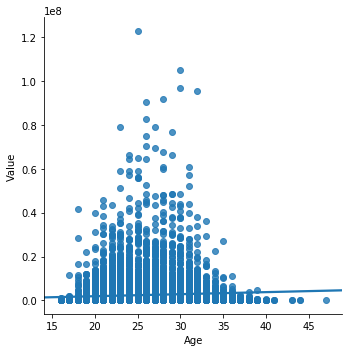

In [4]:
print('correlation between Age and Value\n',round(players['Age'].corr(players['Value']),2))
sns.lmplot(x='Age',y='Value',data=players)

# there is very little correlation between age and value
# this part of the hypothesis is invalid

In [20]:
# find the correlation between skill and value by club
# compare this to the correlation between skill and value without the groupby
def correlate(group):
    return group['age_adjusted_overall'].corr(group['Value'])

print('correlations with groupby\n',
      players.groupby('Club').apply(correlate).sort_values().describe())
print('\n')
print('correlations without groupby\n',
      players['age_adjusted_overall'].corr(players['Value']))

# observations
# it is clear that value is more highly correlated with
# skill when comparing a player amongst his peers

correlations with groupby
 count    647.000000
mean       0.722430
std        0.102637
min        0.266614
25%        0.664293
50%        0.734621
75%        0.792041
max        0.957832
dtype: float64


correlations without groupby
 0.631530721729


In [26]:
# find the correlation between best position and value per club

# I should enumerate the list of best positions, 
# each of which will be assigned the value of the player
# then compute the distribution of value for each position
# df['B'].apply(lambda x: pd.Series(x[0]))
# .stack()
# .reset_index(level=1, drop=True)
# .to_frame('B')
# .join(df[['A']], how='left')
# >>> from ast import literal_eval
# >>> literal_eval('[1.23, 2.34]')
# [1.23, 2.34]
from ast import literal_eval
players['best_positions'] = players['best_positions'].apply(lambda x: literal_eval(x))#.apply(lambda x: pd.Series(x[0]))

### procedure
* find out what country each club plays in
* calculate the value of each club as the sum of all of its players value
* compare the value geometric mean of each country
* build a linear model that predicts club value given country

predicting value by winnings
* find out the winnings of each club
